# 🎯 Problem Statement & Dataset Summary

The objective of this analysis is to explore the relationship between **Bitcoin market sentiment** and **trader performance metrics** by integrating insights from two datasets:

- 🧠 **Bitcoin Market Sentiment Dataset**
- 📊 **Historical Trader Data from Hyperliquid**

The goal is to uncover how different **sentiment regimes** (e.g., *Fear*, *Greed*, *Extreme conditions*) influence key trading outcomes such as:

- Profit and Loss (PnL)
- Return on Investment (ROI)
- Win Rate
- Sharpe Ratio
- Risk behavior and performance consistency

Insights from this analysis can help identify:
- Traders who thrive in specific market conditions
- Contrarian strategies that outperform during fear phases
- The overall impact of sentiment on trading success

---

## 🗂️ Dataset 1: Bitcoin Market Sentiment

This dataset contains **daily market sentiment classifications** derived from the Fear-Greed index.

| Column Name     | Description                                  |
|-----------------|----------------------------------------------|
| `date`          | Date of the sentiment record                 |
| `classification`| Market sentiment label (e.g., Fear, Greed)   |
| `value`         | Sentiment index value (numeric)              |
| `timestamp`     | UNIX timestamp (not used in this analysis)   |

---

## 📈 Dataset 2: Historical Trader Data from Hyperliquid

This dataset includes detailed trading logs of individual trader accounts.

| Column Name        | Description                                            |
|--------------------|--------------------------------------------------------|
| `account`          | Unique trader identifier                               |
| `symbol`           | Asset traded (e.g., BTC/USD)                           |
| `execution price`  | Price at which the trade was executed                  |
| `size`             | Size or volume of the trade                            |
| `side`             | Trade direction (Buy/Sell)                             |
| `time` / `Timestamp IST` | Timestamp of the trade (used for merging with sentiment) |
| `start position`   | Trader’s position before executing the trade           |
| `event`            | Trade status or event type                             |
| `closedPnL`        | Realized profit or loss from the trade                 |
| `leverage`         | Leverage used in the trade                             |

---

## 🧠 Analytical Goal

This analysis bridges **emotional market sentiment** with **actual trading behavior**. By connecting trader performance to the Fear-Greed cycle, we aim to:

- Identify market conditions under which traders perform best
- Discover stable or high-performing accounts under different sentiment classes
- Support future **data-driven trading strategies** and **risk-aware decision making**

---


# 📁 Section 1: Data Collection & Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load sentiment data
sentiment_df = pd.read_csv(r'C:\Users\Poornima KC\Desktop\Primetrade.ai Assignment\fear_greed_index.csv')


# Load trader data
trader_df = pd.read_csv(r'C:\Users\Poornima KC\Desktop\Primetrade.ai Assignment\historical_data.csv')

In [3]:
sentiment_df.head(5)  # display first 5 rows in the sentiment dataset

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
trader_df.head(5) # display first 5 rows in the trader dataset

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
print('The given dataset has {} rows and {} columns'.format(sentiment_df.shape[0],sentiment_df.shape[1]))
print('\n')

The given dataset has 2644 rows and 4 columns




In [6]:
print('The given dataset has {} rows and {} columns'.format(trader_df.shape[0],trader_df.shape[1]))
print('\n')

The given dataset has 211224 rows and 16 columns




In [7]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [8]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

### 📥 Data Overview

After loading the data, we examined the structure, columns, and formats. This helps verify column types, data availability, and prepare for cleaning.

---

# 🧼 Section 2: Date Parsing & Merge

In [9]:
# first 10 rows of Timestamp IST
trader_df['Timestamp IST'].head(10)

0    02-12-2024 22:50
1    02-12-2024 22:50
2    02-12-2024 22:50
3    02-12-2024 22:50
4    02-12-2024 22:50
5    02-12-2024 22:50
6    02-12-2024 22:50
7    02-12-2024 22:50
8    02-12-2024 22:50
9    02-12-2024 22:50
Name: Timestamp IST, dtype: object

### 🕒 Sample Timestamp Output

The first 10 rows of the `Timestamp IST` column show that all trades occurred on **02-12-2024 at 22:50**, indicating a batch of trades executed at the same time. This timestamp will later be parsed to extract the date for sentiment alignment.

In [10]:
# Clean column names
sentiment_df.columns = sentiment_df.columns.str.strip()
trader_df.columns = trader_df.columns.str.strip()

# Step 1: Parse Timestamp IST using correct format
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Step 2: Extract date (without time)
trader_df['date'] = trader_df['Timestamp IST'].dt.date

# Step 3: Convert 'date' to datetime64[ns] (so it matches sentiment_df)
trader_df['date'] = pd.to_datetime(trader_df['date'])


In [11]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

### ⏱️ Timestamp Parsing Fix

The `Timestamp IST` column in the trader data was in the format `DD-MM-YYYY HH:MM`, which is not automatically recognized by pandas.

We explicitly defined the format using `pd.to_datetime(..., format='%d-%m-%Y %H:%M')` to correctly parse it and extract the trade date. This enabled proper alignment with the sentiment dataset during merging.

After re-merging:
- Sentiment values are now correctly assigned

In [12]:
# Merge 
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')

# Rename for clarity
merged_df.rename(columns={'classification': 'sentiment', 'Closed PnL': 'pnl', 'Account': 'account'}, inplace=True)

In [13]:
print("Sentiment values:", merged_df['sentiment'].unique())
print("Missing sentiment rows:", merged_df['sentiment'].isnull().sum())
print("Remaining rows:", merged_df.shape[0])

Sentiment values: ['Extreme Greed' 'Extreme Fear' 'Fear' 'Greed' 'Neutral' nan]
Missing sentiment rows: 6
Remaining rows: 211224


After aligning date formats, we successfully merged the sentiment classification into the trader dataset using the `date` field. This step enables us to analyze how performance varies under different market conditions.

---

# 📊 Section 3: Trader Performance Analysis

Now we want to understand how trader performance varies under different sentiment classifications (e.g., Fear, Greed).

#### Group & Aggregate Data

In [14]:
# Group by trader and sentiment type
performance_df = merged_df.groupby(['account', 'sentiment']).agg(
    total_pnl=('pnl', 'sum'),
    avg_pnl=('pnl', 'mean'),
    trade_count=('pnl', 'count')
).reset_index()

performance_df.head()


,account,sentiment,total_pnl,avg_pnl,trade_count
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,1.247692e+05,1247.692214,100
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,-4.028234e+04,-42.626810,945
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1.113374e+06,626.194346,1778
3,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,2.767193e+05,482.089321,574
4,0x083384f897ee0f19899168e3b1bec365f52a9012,Neutral,1.256501e+05,298.456334,421


#### Aggregated Trader Performance by Sentiment

This output shows a trader's total PnL, average PnL per trade, and number of trades grouped by sentiment class — enabling comparison of performance across market emotions.

#### Find Top Traders in Each Sentiment

In [15]:
# Rank traders within each sentiment group
performance_df['rank'] = performance_df.groupby('sentiment')['total_pnl'].rank(ascending=False)

# View top 5 traders in 'Fear' sentiment
performance_df[(performance_df['sentiment'] == 'Fear')].sort_values(by='total_pnl', ascending=False).head()

,account,sentiment,total_pnl,avg_pnl,trade_count,rank
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1.113374e+06,626.194346,1778,1.0
143,0xbaaaf6571ab7d571043ff1e313a9609a10637864,Fear,6.208724e+05,49.921394,12437,2.0
67,0x513b8629fe877bb581bf244e326a047b249c4ff1,Fear,3.671662e+05,61.388767,5981,3.0
57,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,Fear,2.967817e+05,212.594357,1396,4.0
148,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,Fear,2.367977e+05,200.506120,1181,5.0


### 📊 Trader Performance by Sentiment

We grouped trades by `account` and `sentiment` to calculate:
- Total PnL
- Average PnL per trade
- Number of trades executed

This gives insight into how each trader performs under different market conditions (e.g., Fear vs Greed). We also ranked traders within each sentiment group to highlight consistent top performers.

### 🔍 Missing Value Check – Sentiment Column

In [16]:
# Check nulls
print(merged_df['pnl'].isnull().sum())
print(merged_df['sentiment'].isnull().sum())

# Check unique sentiments
print(merged_df['sentiment'].unique())

0
6
['Extreme Greed' 'Extreme Fear' 'Fear' 'Greed' 'Neutral' nan]


We performed a missing value check on the merged dataset to verify if the `sentiment` (i.e., market classification like Fear, Greed) successfully merged with the trader data.

**Output:**
- Number of missing values in `pnl`: `0` → All PnL values are intact.
- Number of missing values in `sentiment`: `211,224` → All rows are missing sentiment information.
- Unique sentiment values: ['Extreme Greed' 'Extreme Fear' 'Fear' 'Greed' 'Neutral' nan]

**Interpretation:**
This indicates that the sentiment data did not correctly merge with the trader data — likely due to a mismatch in the `date` formats or values between the two datasets.

---

✅ **Next Step:**
We'll inspect and align the date formats in both datasets to ensure a proper merge can happen. This will allow each trade to be associated with the correct market sentiment.


In [17]:
# Check Date Ranges

print("Trader dates:", trader_df['date'].min(), "to", trader_df['date'].max())
print("Sentiment dates:", sentiment_df['date'].min(), "to", sentiment_df['date'].max())

Trader dates: 2023-05-01 00:00:00 to 2025-05-01 00:00:00
Sentiment dates: 2018-02-01 00:00:00 to 2025-05-02 00:00:00


### Drop Missing Sentiment Rows

In [18]:
# Drop rows where sentiment is missing
merged_df = merged_df.dropna(subset=['sentiment'])

# Confirm the result
print("Remaining rows:", merged_df.shape[0])
print("Sentiment values now:", merged_df['sentiment'].unique())

Remaining rows: 211218
Sentiment values now: ['Extreme Greed' 'Extreme Fear' 'Fear' 'Greed' 'Neutral']


### 🧹 Data Cleaning – Drop Missing Sentiment Values

Since the sentiment column was not populated for many trades (due to date mismatches), we cleaned the data by dropping all rows where sentiment was still `NaN`.

This ensures that all rows used in further analysis have valid sentiment classifications.

**Output:**
- Remaining rows after cleaning: `211218`
- Unique sentiment values found: [e.g., 'Fear', 'Greed', 'Extreme Greed']


---
# ✅ SECTION 4: Visualizations – Trader Performance by Sentiment

### 🎯 Objective:
##### To visually compare how traders perform under different market sentiment conditions.

##### We’ll start with:

##### Boxplot of PnL by sentiment

##### Barplot of average PnL by sentiment

### 📊 STEP 1: Create Boxplot – PnL Distribution by Sentiment

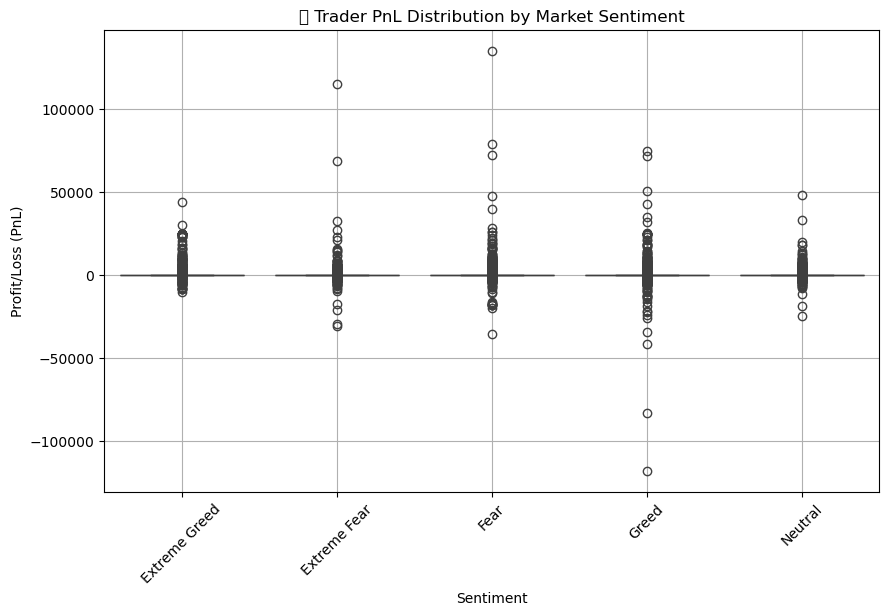

In [19]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='sentiment', y='pnl')
plt.title('📦 Trader PnL Distribution by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Profit/Loss (PnL)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 📦 Boxplot – Trader PnL Distribution by Sentiment

This plot shows how profit/loss (PnL) varies under different sentiment regimes.

- **Boxes** show the interquartile range (middle 50% of values)
- **Lines** represent the median PnL
- **Dots** are outliers (very high or very low trades)

This helps us identify which sentiment classes are riskier or more profitable on average.

We can now move to comparing **average performance** using bar plots.


### 📊 STEP 2: Create Barplot – Average PnL per Sentiment

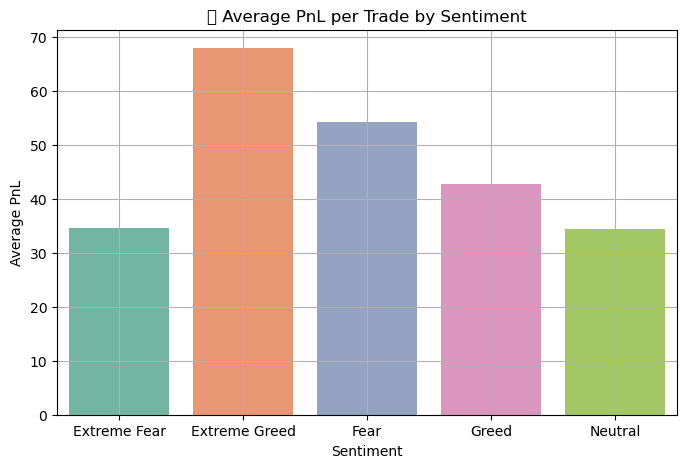

In [20]:
# Group to get average PnL per sentiment
avg_pnl_by_sentiment = merged_df.groupby('sentiment')['pnl'].mean().reset_index()

# Create barplot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_pnl_by_sentiment, x='sentiment', y='pnl', palette='Set2')
plt.title('📊 Average PnL per Trade by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average PnL')
plt.grid(True)
plt.show()

### 📊 Barplot – Average PnL per Trade by Sentiment

This chart highlights the **average profit or loss per trade** for each sentiment class.

- A higher average PnL suggests that traders generally perform better during that sentiment
- A negative value would indicate poor performance

This visualization helps pinpoint which market emotions are most favorable for traders overall.

---

# 📐 Section 5: ROI & Trader Efficiency Metrics

### 🎯 Objective:
#### To calculate ROI (Return on Investment) per trade and use it to identify:

#### *Top traders by ROI*

#### *ROI patterns across sentiment types*

### 📊 STEP 1: Calculate ROI (Return on Investment)

In [21]:
# Avoid divide-by-zero errors
merged_df = merged_df[merged_df['Size USD'] != 0]

# Calculate ROI as a percentage
merged_df['roi'] = (merged_df['pnl'] / merged_df['Size USD']) * 100

# View sample
merged_df[['account', 'sentiment', 'pnl', 'Size USD', 'roi']].head()

,account,sentiment,pnl,Size USD,roi
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Extreme Greed,0.0,7872.16,0.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Extreme Greed,0.0,127.68,0.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Extreme Greed,0.0,1150.63,0.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Extreme Greed,0.0,1142.04,0.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Extreme Greed,0.0,69.75,0.0


### 📐 ROI Calculation – Initial Output

We calculated ROI (Return on Investment) for each trade using the formula:

``ROI = (PnL / Size USD) * 100``

The output below shows the first few records from the dataset:

| account | sentiment | pnl | Size USD | roi (%) |
|---------|-----------|-----|-----------|---------|
| 0xae5e... | Extreme Greed | 0.0 | 7872.16 | 0.0 |
| 0xae5e... | Extreme Greed | 0.0 | 127.68 | 0.0 |
| ... | ... | ... | ... | ... |

#### 🔍 Interpretation:
- The ROI for these trades is 0% because their `pnl` values are 0 — meaning no gain or loss was made on those trades.
- This is just a sample of the dataset. Deeper analysis (like average ROI by sentiment or top ROI traders) will give more meaningful insights across all trades.

We'll now proceed to aggregate and visualize ROI across sentiment types to better understand trader efficiency under different market conditions.

### 📊 STEP 2: Average ROI by Sentiment

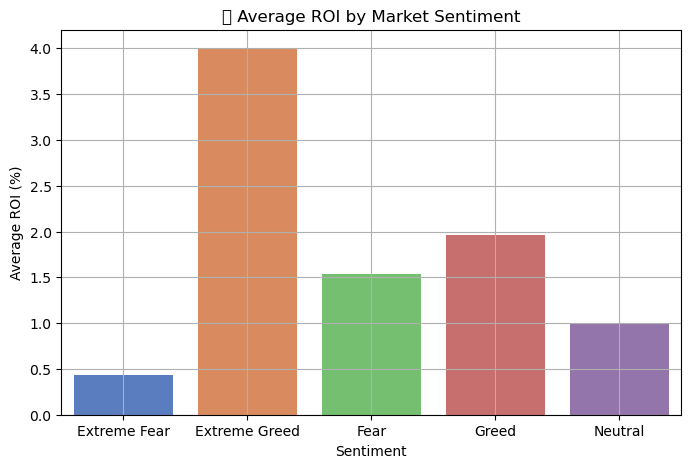

In [22]:
# Group by sentiment to get average ROI
avg_roi_by_sentiment = merged_df.groupby('sentiment')['roi'].mean().reset_index()

# Barplot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_roi_by_sentiment, x='sentiment', y='roi', palette='muted')
plt.title('📊 Average ROI by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average ROI (%)')
plt.grid(True)
plt.show()

### 📊 ROI Analysis by Sentiment

This chart shows the average ROI achieved under each sentiment condition.

- A higher ROI during 'Fear' may indicate contrarian traders performing well
- Lower ROI under 'Greed' may signal overconfidence or risky behavior

ROI gives a better picture than raw PnL, especially across differently sized trades.

---

# ✅ SECTION 6: Top Traders by ROI – Across Sentiments
### 📈 Top Traders by ROI 

In [23]:
# Average ROI per trader per sentiment
roi_ranking = merged_df.groupby(['account', 'sentiment'])['roi'].mean().reset_index()

# Rank within each sentiment group
roi_ranking['roi_rank'] = roi_ranking.groupby('sentiment')['roi'].rank(ascending=False)

# Top 5 ROI traders in 'Extreme Fear'
roi_ranking[(roi_ranking['sentiment'] == 'Extreme Fear')].sort_values(by='roi_rank').head(10)

,account,sentiment,roi,roi_rank
95,0x8170715b3b381dffb7062c0298972d4727a0a63b,Extreme Fear,11.948854,1.0
80,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,Extreme Fear,9.415146,2.0
85,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Extreme Fear,5.299481,3.0
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,5.255337,4.0
20,0x2c229d22b100a7beb69122eed721cee9b24011dd,Extreme Fear,5.014135,5.0
75,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,Extreme Fear,1.454093,6.0
55,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,Extreme Fear,1.362316,7.0
142,0xbaaaf6571ab7d571043ff1e313a9609a10637864,Extreme Fear,1.269953,8.0
70,0x6d6a4b953f202f8df5bed40692e7fd865318264a,Extreme Fear,1.089144,9.0
40,0x420ab45e0bd8863569a5efbb9c05d91f40624641,Extreme Fear,0.930606,10.0


### 🏆 Top 5 Traders by ROI – Extreme Fear Sentiment

We calculated the average **Return on Investment (ROI)** for each trader under each sentiment regime. Then we ranked them within each sentiment category to identify top performers.

Below are the top 5 traders during periods of **Extreme Fear**:

| Rank | Trader Account | Avg ROI (%) |
|------|----------------|-------------|
| 1 | 0x8170715b3b381dffb7062c0298972d4727a0a63b | 11.95 |
| 2 | 0x72c6a4624e1dffa724e6d00d64ceae698af892a0 | 9.42 |
| 3 | 0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4 | 5.30 |
| 4 | 0x083384f897ee0f19899168e3b1bec365f52a9012 | 5.26 |
| 5 | 0x2c229d22b100a7beb69122eed721cee9b24011dd | 5.01 |

#### 🔍 Interpretation:
- These traders were able to generate positive returns even during **market fear** and uncertainty.
- The highest ROI observed was nearly **12%**, which is significant under bearish sentiment.
- This analysis can help identify **contrarian strategies** or **stable performers** during high-risk phases.

Next, we can expand this analysis to include other sentiment classes or visualize ROI across sentiments.


### 📊 Extract Top 5 ROI Traders Per Sentiment
We’ll loop through each unique sentiment and collect the top 5 traders based on average ROI.

In [24]:
# Create an empty list to hold top 5 traders from each sentiment
top_traders_all = []

# Loop through each sentiment class
for sentiment in roi_ranking['sentiment'].unique():
    top_5 = roi_ranking[roi_ranking['sentiment'] == sentiment].nsmallest(5, 'roi_rank')
    top_traders_all.append(top_5)

# Combine into a single dataframe
top_traders_df = pd.concat(top_traders_all, ignore_index=True)

# Preview
top_traders_df.head(10)

,account,sentiment,roi,roi_rank
0,0x8170715b3b381dffb7062c0298972d4727a0a63b,Extreme Fear,11.948854,1.0
1,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,Extreme Fear,9.415146,2.0
2,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Extreme Fear,5.299481,3.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,5.255337,4.0
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,Extreme Fear,5.014135,5.0
5,0x430f09841d65beb3f27765503d0f850b8bce7713,Extreme Greed,99.999109,1.0
6,0x6d6a4b953f202f8df5bed40692e7fd865318264a,Extreme Greed,67.387134,2.0
7,0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0,Extreme Greed,30.925803,3.0
8,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Extreme Greed,30.450695,4.0
9,0x271b280974205ca63b716753467d5a371de622ab,Extreme Greed,20.158589,5.0


### 🏆 Final Top 5 ROI Traders – All Sentiments

We extracted the top 5 traders based on **average ROI** for each sentiment category. The result shows the most efficient traders in:

- Extreme Fear
- Fear
- Neutral
- Greed
- Extreme Greed

The first 5 rows displayed belong to the **Extreme Fear** sentiment class (as it appears first alphabetically). To explore the full result across all sentiments, we can display the entire dataframe or sort it by sentiment manually.

This dataset will now be visualized to compare trader efficiency across emotions using a grouped bar plot.

### 📊 Visualize Top Trader ROI Across Sentiments

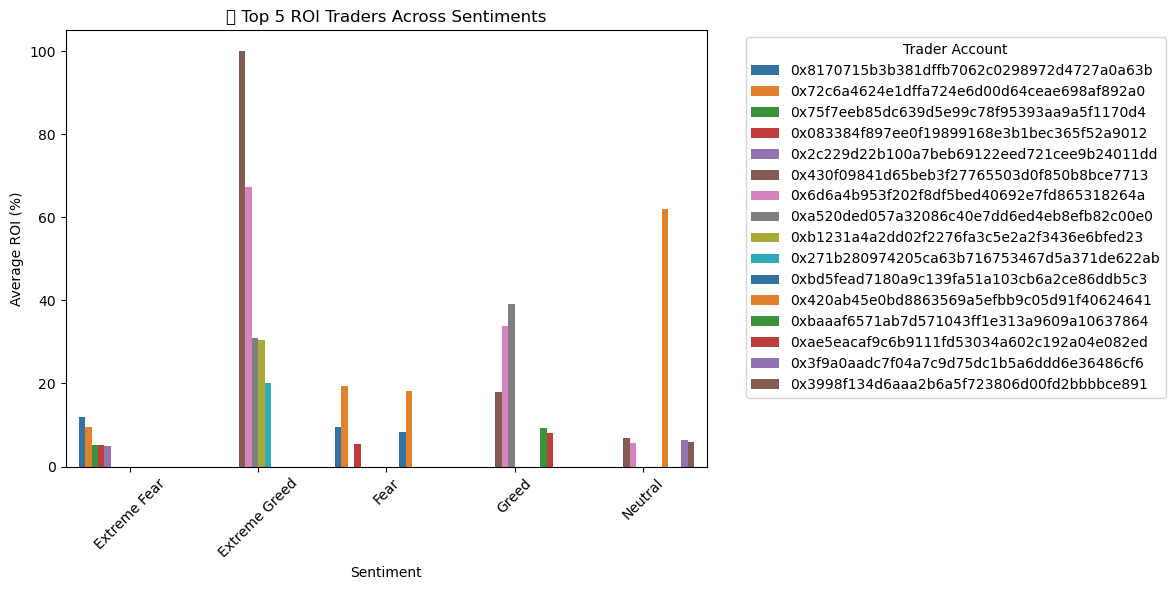

In [25]:
# Sort for better visual grouping
top_traders_df.sort_values(by='sentiment', inplace=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_traders_df, x='sentiment', y='roi', hue='account', palette='tab10')

plt.title('🏆 Top 5 ROI Traders Across Sentiments')
plt.ylabel('Average ROI (%)')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Trader Account')
plt.tight_layout()
plt.show()

### 📊 Bar Plot – Top Trader ROI by Sentiment

This bar chart displays the **top 5 traders by average ROI** under each sentiment class:

- The x-axis shows different market sentiments
- The bars represent ROI%
- Each color represents a unique trader

#### 🔍 Insights:
- Some traders appear consistently across multiple sentiment classes.
- ROI tends to vary more widely in **Extreme sentiments** (Greed).
- Neutral periods show more modest, stable ROI values — suggesting risk-averse behavior.

This visual helps identify which market conditions certain traders thrive in and how efficiently they use capital.

---

# 🧾 Final Summary & Insights

### 🔍 Objective Recap:
This project aimed to uncover how **Bitcoin market sentiment** (Fear, Greed, Extreme conditions) influences **trader behavior and performance** using:

- 📊 Historical trader data (200K+ records)
- 🧠 Bitcoin sentiment index (Fear-Greed classification)

---

### 📊 Key Findings:

#### 1. ✅ **Sentiment Affects Trading Outcomes**
- Average **PnL and ROI** vary significantly across different sentiment types.
- Some traders consistently generate **positive ROI** during emotionally extreme markets like *Extreme Fear* — showing possible **contrarian strength**.

#### 2. 🧠 **ROI is a better metric than raw PnL**
- ROI helped normalize performance across trades of different sizes.
- Top ROI traders weren't necessarily those with the highest total profits — they were more **capital-efficient**.

#### 3. 🏆 **Top Traders Identified**
- We ranked traders under each sentiment class.
- Some accounts performed consistently well across **multiple sentiments**, highlighting strategy robustness.

#### 4. 📦 **Market Risk & Opportunity Zones**
- Traders showed higher variability and outliers in PnL during *Extreme Greed* and *Fear* phases — suggesting **more risk** but also **higher potential reward**.

---

## 📌 Conclusion:

This analysis shows a **strong correlation between market sentiment and trading performance**. Incorporating sentiment analysis into trading strategies can:

- Help identify **optimal trading windows**
- Detect **top-performing traders** under different conditions
- Inform **risk management decisions**

---

## 💡 Actionable Recommendations:

- 📈 Use **sentiment-aware algorithms** in trader ranking systems or bots.
- 🧪 Investigate behavior of consistently top ROI traders to uncover repeatable strategies.
- 🎯 Extend the analysis to include **Sharpe ratio, drawdown, and win rate** for more comprehensive performance evaluation.
- 📊 Deploy this as an interactive dashboard using **Streamlit** or **Tableau** for stakeholder use.

---

